In [1]:
# IMPORTS
import cvxpy as cp
import numpy as np
import numpy.linalg
import numpy.matlib
from numpy.linalg import norm
import algorithms.trend_filter_derivative_pkg as tfilter
from scipy import interpolate
from scipy import signal
import csv   
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# LOAD DATA

# 1) LOAD DYNAMICS AND TIME ARRAYS

filepath = 'data_files/Lorenz63_dynamics.csv'
dynamics = np.genfromtxt(filepath, delimiter=',')

t = dynamics[0]
data = dynamics[1:]
n_states = int(data.shape[0] / 2)
DX = data[n_states:]
t_samples = len(t)


# 2) LOAD OBSERVATION SAMPLES
Y_samples = []
noise_lvl = '0.01'

for state in range(n_states):
    
    filepath = 'data_files/Lorenz63_samples_noise_' + noise_lvl +'_Y'+ str(state+1) + '.csv'
    y = np.genfromtxt(filepath, delimiter=',')
        
    Y_samples.append(y)
    
n_samples = Y_samples[0].shape[0]

/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 113.28866540414846, tolerance: 3.2926549243731453
  positive)


lambda_max too large. Reducing it 10 times...
lambda_max too large. Reducing it 10 times...
lambda_max too large. Reducing it 10 times...


/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 113.28866540414846, tolerance: 3.2926549243731453
  positive)
/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 113.2886711951, tolerance: 3.2926549243731453
  positive)
/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 113.28867903040617, tolerance: 3.2926549243731453
  positive)
/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to in

/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 113.38978903974717, tolerance: 3.2926549243731453
  positive)
/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 113.4195894652923, tolerance: 3.2926549243731453
  positive)
/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 113.46043658706651, tolerance: 3.2926549243731453
  positive)
/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to

/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 115.19761647157185, tolerance: 3.2926549243731453
  positive)
/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 115.17933623085575, tolerance: 3.2926549243731453
  positive)
/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 115.23764044891405, tolerance: 3.2926549243731453
  positive)
/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want t

/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.723760891359234, tolerance: 3.2926549243731453
  positive)
/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31.23618223125345, tolerance: 3.2926549243731453
  positive)
/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.081406256835407, tolerance: 3.2926549243731453
  positive)
/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to 

lambda_max too large. Reducing it 10 times...
lambda_max too large. Reducing it 10 times...
lambda_max too large. Reducing it 10 times...


/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 113.28866540414846, tolerance: 3.2926549243731453
  positive)
/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 114.10061286710398, tolerance: 3.2926549243731453
  positive)
/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 115.18995983579809, tolerance: 3.2926549243731453
  positive)
/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want t

  Convergence criterion reached in 19 iterations.


/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 135.24387141718853, tolerance: 3.2926549243731453
  positive)
/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 415.9007101256846, tolerance: 2.1048013718806637
  positive)


lambda_max too large. Reducing it 10 times...
lambda_max too large. Reducing it 10 times...
lambda_max too large. Reducing it 10 times...


/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 415.9007101256846, tolerance: 2.1048013718806637
  positive)
/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 415.90071274708384, tolerance: 2.1048013718806637
  positive)
/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 415.90071629473664, tolerance: 2.1048013718806637
  positive)
/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to

/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 415.9714832089649, tolerance: 2.1048013718806637
  positive)
/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 415.98714198791396, tolerance: 2.1048013718806637
  positive)
/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 416.02085626484285, tolerance: 2.1048013718806637
  positive)
/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to

/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 420.6775724039152, tolerance: 2.1048013718806637
  positive)
/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 421.44927809083606, tolerance: 2.1048013718806637
  positive)
/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 422.44341807339356, tolerance: 2.1048013718806637
  positive)
/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to

/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 914.741160817541, tolerance: 2.1048013718806637
  positive)
/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 782.3389381686807, tolerance: 2.1048013718806637
  positive)
/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.801944139077023, tolerance: 2.1048013718806637
  positive)
/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to in

lambda_max too large. Reducing it 10 times...
lambda_max too large. Reducing it 10 times...
lambda_max too large. Reducing it 10 times...


/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 415.9007101256846, tolerance: 2.1048013718806637
  positive)
/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 416.6011238442395, tolerance: 2.1048013718806637
  positive)
/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 421.6012140371234, tolerance: 2.1048013718806637
  positive)
/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to i

  Convergence criterion reached in 21 iterations.


/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 462.9743791617191, tolerance: 2.1048013718806637
  positive)
/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 457.54880521679956, tolerance: 2.242567420770508
  positive)


lambda_max too large. Reducing it 10 times...
lambda_max too large. Reducing it 10 times...
lambda_max too large. Reducing it 10 times...


/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 457.54880521679956, tolerance: 2.242567420770508
  positive)
/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 457.54880256083595, tolerance: 2.242567420770508
  positive)
/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 457.54879896597305, tolerance: 2.242567420770508
  positive)
/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to i

/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 457.4269471406195, tolerance: 2.242567420770508
  positive)
/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 457.36162518158767, tolerance: 2.242567420770508
  positive)
/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 457.2645582398063, tolerance: 2.242567420770508
  positive)
/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to inc

/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 463.64675301688703, tolerance: 2.242567420770508
  positive)
/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 465.1298310739073, tolerance: 2.242567420770508
  positive)
/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 467.52369501032865, tolerance: 2.242567420770508
  positive)
/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to in

/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 756.0149754281024, tolerance: 2.242567420770508
  positive)
/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.279998830818386, tolerance: 2.242567420770508
  positive)
/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.664019065020057, tolerance: 2.242567420770508
  positive)
/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to in

lambda_max too large. Reducing it 10 times...
lambda_max too large. Reducing it 10 times...
lambda_max too large. Reducing it 10 times...


/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 457.54880521679956, tolerance: 2.242567420770508
  positive)
/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 456.23663727137796, tolerance: 2.242567420770508
  positive)
/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 465.7365292142367, tolerance: 2.242567420770508
  positive)
/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to in

  Convergence criterion reached in 20 iterations.


/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 626.0191621156285, tolerance: 2.242567420770508
  positive)


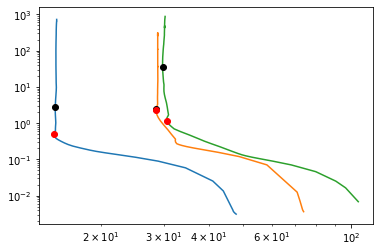

In [6]:
################### DENOISING AND NUMERICAL DIFFERENTIATION - SMOOTHING SPLINES ###################
DY_tf = np.zeros((t_samples, n_states))
error_dX = np.zeros((n_samples,n_states))
trim = int(np.floor(5 / 100 * t_samples))


for sample in range(1):
    #CVX code
    for state in range(n_states):
        
        y = Y_samples[state][sample,:]
        
        tf_flc = tfilter.full_lcurve(y, t, order = 3, lambda_min = 1e-16, lambda_max = 1)
        tf_path = tf_flc[0]
        res, reg = tf_flc[1]
        error_path = np.zeros(tf_path.shape[1])
        for i in range(tf_path.shape[1]):
            error_path[i] = norm(tf_path[:,i] - DX[state,:]) / norm(DX[state,:])
        
        min_indx = np.argmin(error_path)
        #Find corner point
        tf_lc = tfilter.lcurve_corner(y, t, order = 3, lambda_min = 1e-16, lambda_max = 1)
        dy_tf = tf_lc[0]
        resc, regc = tf_lc[3]
        plt.loglog(res, reg)
        plt.loglog(res[min_indx], reg[min_indx],'ko')
        plt.loglog(resc[-1], regc[-1], 'ro')
        
        #Remove ends
        DYhat_tf = dy_tf[trim:-trim]
        #Compute errors
        error_dX[sample,state] = norm(DYhat_tf - DX[state,trim:-trim]) / norm(DX[state,trim:-trim])

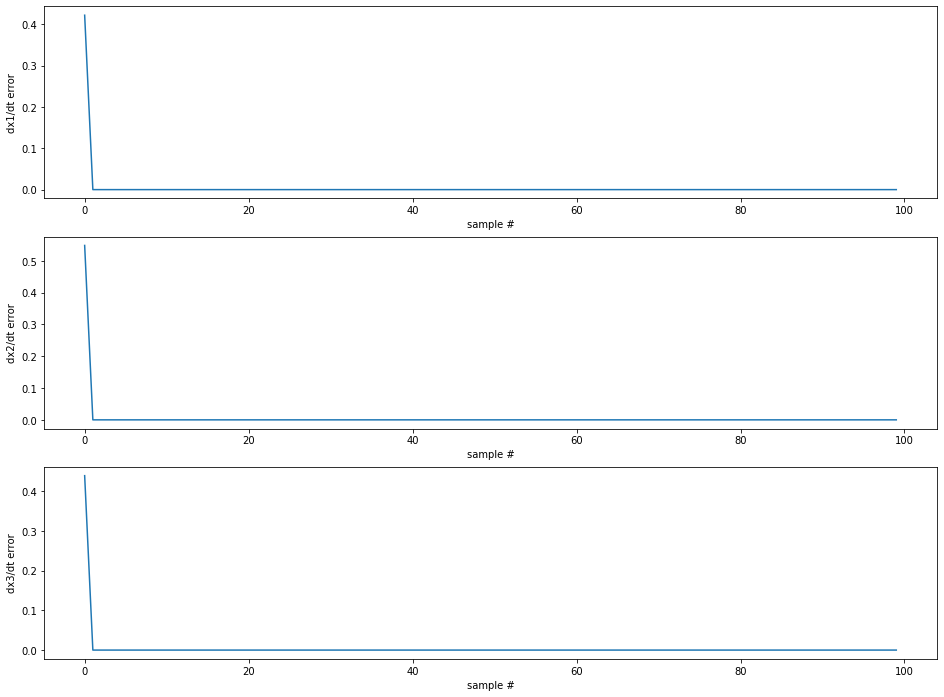

In [5]:
fig, ax = plt.subplots(n_states,1, figsize = (16,12))

for state in range(n_states):
    ax[state].plot(error_dX[:,state])
    ax[state].set_ylabel(f'dx{state+1}/dt error')
    ax[state].set_xlabel('sample #')

In [ ]:
mean_dX_error = np.zeros(n_states)
var_dX_error = np.zeros(n_states)

ind_names = []
col_names = ['mean error dx', 'var. error dx']

for state in range(n_states):
    mean_dX_error[state] = error_dX[:,state].mean()
    var_dX_error[state] = error_dX[:,state].var()
    ind_names.extend(['state x' + str(state+1)])
    

In [ ]:
errors = pd.DataFrame(np.array([mean_dX_error, var_dX_error]).T, index = ind_names, columns=col_names)
errors